In [1]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header=None
)

In [2]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def standardize_labels(s): 
    if (s == 'Iris-setosa'):
        return -1
    else:
        return 1

_D = df.iloc[0:100, [0, 2, 4]]
_D[4] = _D[4].map(standardize_labels)
D =_D.values
D

array([[ 5.1,  1.4, -1. ],
       [ 4.9,  1.4, -1. ],
       [ 4.7,  1.3, -1. ],
       [ 4.6,  1.5, -1. ],
       [ 5. ,  1.4, -1. ],
       [ 5.4,  1.7, -1. ],
       [ 4.6,  1.4, -1. ],
       [ 5. ,  1.5, -1. ],
       [ 4.4,  1.4, -1. ],
       [ 4.9,  1.5, -1. ],
       [ 5.4,  1.5, -1. ],
       [ 4.8,  1.6, -1. ],
       [ 4.8,  1.4, -1. ],
       [ 4.3,  1.1, -1. ],
       [ 5.8,  1.2, -1. ],
       [ 5.7,  1.5, -1. ],
       [ 5.4,  1.3, -1. ],
       [ 5.1,  1.4, -1. ],
       [ 5.7,  1.7, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 5.4,  1.7, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 4.6,  1. , -1. ],
       [ 5.1,  1.7, -1. ],
       [ 4.8,  1.9, -1. ],
       [ 5. ,  1.6, -1. ],
       [ 5. ,  1.6, -1. ],
       [ 5.2,  1.5, -1. ],
       [ 5.2,  1.4, -1. ],
       [ 4.7,  1.6, -1. ],
       [ 4.8,  1.6, -1. ],
       [ 5.4,  1.5, -1. ],
       [ 5.2,  1.5, -1. ],
       [ 5.5,  1.4, -1. ],
       [ 4.9,  1.5, -1. ],
       [ 5. ,  1.2, -1. ],
       [ 5.5,  1.3, -1. ],
 

In [ ]:
'''
Decided to use all 
the data
'''



In [5]:
def create_test_train_partition(D, train_percentage=0.7):
    '''
    Parameters
    ------------
    D : [array-like], shape = [n_samples, n_features + 1]
        where n_samples is the number of samples and 
        n_features is the number of features.
        D[i] = [...X, y ], where X is an input vector
        and y is its corresponding label. 

    train_percentage: float
        percentage of D that comprises the train
        part of the train-test partition.
        0 <= train_percentage <= 1
        
    Returns 
    -------
    D_train: [array-like], 
             shape = [int(n_samples * train_percentage), n_features + 1]
    D_test:  [array-like], 
             shape = [n_samples - int(n_samples * train_percentage), n_features + 1]
    '''
    D_copy = D[:]
    np.random.shuffle(D_copy)
    split_index = int(train_percentage * len(D))
    D_train = D_copy[:split_index]
    D_test = D_copy[split_index:]
    return D_train, D_test



In [6]:
D_train, D_test = create_test_train_partition(D)

len(D_train), len(D_test)

(70, 30)

In [7]:
D_train

array([[ 4.9,  1.4, -1. ],
       [ 6.5,  4.6,  1. ],
       [ 5.4,  1.3, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 6.8,  4.8,  1. ],
       [ 4.9,  1.5, -1. ],
       [ 7. ,  4.7,  1. ],
       [ 5.1,  1.4, -1. ],
       [ 6.1,  4.7,  1. ],
       [ 4.8,  1.6, -1. ],
       [ 6.9,  4.9,  1. ],
       [ 5. ,  1.6, -1. ],
       [ 5.3,  1.5, -1. ],
       [ 6.2,  4.3,  1. ],
       [ 5.2,  3.9,  1. ],
       [ 5.1,  3. ,  1. ],
       [ 6. ,  4.5,  1. ],
       [ 6.4,  4.3,  1. ],
       [ 4.3,  1.1, -1. ],
       [ 5.7,  4.5,  1. ],
       [ 5.8,  4. ,  1. ],
       [ 4.7,  1.3, -1. ],
       [ 5.4,  1.5, -1. ],
       [ 6. ,  5.1,  1. ],
       [ 5.2,  1.4, -1. ],
       [ 6. ,  4.5,  1. ],
       [ 5.6,  3.6,  1. ],
       [ 5.7,  1.5, -1. ],
       [ 5.6,  4.5,  1. ],
       [ 5. ,  1.3, -1. ],
       [ 6.3,  4.9,  1. ],
       [ 5.1,  1.6, -1. ],
       [ 5.5,  3.7,  1. ],
       [ 6.1,  4.6,  1. ],
       [ 5. ,  1.6, -1. ],
       [ 5.4,  1.7, -1. ],
       [ 5.5,  4.4,  1. ],
 

In [8]:
'''
D_train_setosa
D_train_versicolor
D_test_setosa
D_test_versicolor
'''

D_train_setosa = D_train[ D_train[:, 2] == -1 ]
D_train_versicolor = D_train[ D_train[:, 2] == 1 ]
D_test_setosa = D_test[ D_test[:, 2] == -1 ]
D_test_versicolor = D_test[ D_test[:, 2] == 1 ]

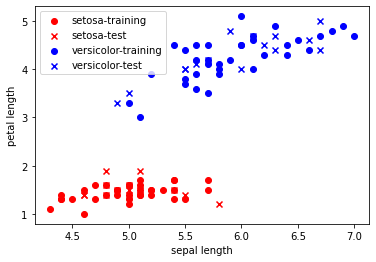

In [9]:
plt.scatter(
    D_train_setosa[:, 0],
    D_train_setosa[:, 1],
    color='red',
    marker='o',
    label='setosa-training'
)

plt.scatter(
    D_test_setosa[:, 0],
    D_test_setosa[:, 1],
    color='red',
    marker='x',
    label='setosa-test'
)

plt.scatter(
    D_train_versicolor[:, 0],
    D_train_versicolor[:, 1],
    color='blue',
    marker='o',
    label='versicolor-training'
)

plt.scatter(
    D_test_versicolor[:, 0],
    D_test_versicolor[:, 1],
    color='blue',
    marker='x',
    label='versicolor-test'
)

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [ ]:
class Perceptron(object):
    def __init__(self, D_train):
        self.weights = np.zeros(D_train.shape[1])
        self.iter_count = 0
        
        x0 = np.ones((D_train.shape[0]))[:, np.newaxis]
        self.D = np.hstack((x0, D_train))
        self.misclassification_history = []
        
    def step_fit(self, eta=0.1):
        X, y = self.D[:, :-1], self.D[:, -1]
        z = np.dot(X, self.weights)
        phi_z = np.where(z >= 0, -1, 1)
        update = eta * (y - phi_z)
        for i in range(len(update)):
            self.weights += update[i] * X[i]
        
    
    def score(self, D):
        pass
    

3

In [136]:
eta = 0.1 
weights = np.zeros(D.shape[1])
x0 = np.ones((D.shape[0]))[:, np.newaxis]
D_with_bias = np.hstack((x0, D))
X, y = D_with_bias[:, :-1], D_with_bias[:, -1]


In [138]:
def predict(x, w):
    return np.where(np.dot(x,w) >= 0.0, 1, -1)

misclassification_count = 0

for xi, target in zip(X, y):
    y_hat = predict(xi, weights)
    print(target, y_hat, sep="\t")
    update = eta * (target - y_hat)
    weights += update * xi
    misclassification_count += int(update != 0.0)

# z = np.dot(X, weights)
# phi_z = np.where(z >= 0, 1, -1)
# update = eta * (y - phi_z)
# x
# z, phi_z, y, update
misclassification_count

-1.0	1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
-1.0	-1
1.0	-1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1


2

In [122]:
for i in range(len(update)):
    weights += update[i] * X[i]

In [134]:
weights

array([0.   , 0.038, 0.066])

In [135]:
misclassification_count

2

array([1. , 5.1, 1.4])

0.0

In [44]:
'''
This function is used to test the math of
create_test_train_partition.
'''
def split_array(arr, percentage):
    split_index = int(percentage * len(arr))
    arr1 = arr[:split_index]
    arr2 = arr[split_index:]
    print(percentage, split_index, arr1, arr2, sep="\t")
    return arr1, arr2

percentages = [i * 0.1 for i in range(11)]
arr = [i+1 for i in range(10)]
for percentage in percentages:
    split_array(arr, percentage)

0.0	0	[]	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0.1	1	[1]	[2, 3, 4, 5, 6, 7, 8, 9, 10]
0.2	2	[1, 2]	[3, 4, 5, 6, 7, 8, 9, 10]
0.30000000000000004	3	[1, 2, 3]	[4, 5, 6, 7, 8, 9, 10]
0.4	4	[1, 2, 3, 4]	[5, 6, 7, 8, 9, 10]
0.5	5	[1, 2, 3, 4, 5]	[6, 7, 8, 9, 10]
0.6000000000000001	6	[1, 2, 3, 4, 5, 6]	[7, 8, 9, 10]
0.7000000000000001	7	[1, 2, 3, 4, 5, 6, 7]	[8, 9, 10]
0.8	8	[1, 2, 3, 4, 5, 6, 7, 8]	[9, 10]
0.9	9	[1, 2, 3, 4, 5, 6, 7, 8, 9]	[10]
1.0	10	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]	[]
